In [1]:
# On importe les tables 
import pandas as pd 
carac = pd.read_csv("20220906_table_caracteristiques.csv")
carac = carac.drop(["Unnamed: 0.1","Unnamed: 0"], axis = 1)
lieux = pd.read_csv("20220906_table_lieux.csv")
lieux = lieux.drop(["Unnamed: 0.1","Unnamed: 0"], axis = 1)
vehicules = pd.read_csv("20220906_table_vehicules.csv")
vehicules = vehicules.drop(["Unnamed: 0.1","Unnamed: 0"], axis = 1)

display(carac.head())
display(carac.dtypes)
display(lieux.head())
display(lieux.dtypes)
display(vehicules.head())
display(vehicules.dtypes)


C:\Users\benpa\AppData\Local\Temp/ipykernel_16980/2889501519.py:4: DtypeWarning: Columns (6,12,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  carac = pd.read_csv("20220906_table_caracteristiques.csv")
C:\Users\benpa\AppData\Local\Temp/ipykernel_16980/2889501519.py:6: DtypeWarning: Columns (4,9,10,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux = pd.read_csv("20220906_table_lieux.csv")
C:\Users\benpa\AppData\Local\Temp/ipykernel_16980/2889501519.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicules = pd.read_csv("20220906_table_vehicules.csv")


Num_Acc  an  mois  jour  hrmn  lum  agg  int  atm  col    com  \
0  201600000001  16     2     1  1445    1    2    1  8.0  3.0    5.0   
1  201600000002  16     3    16  1800    1    2    6  1.0  6.0    5.0   
2  201600000003  16     7    13  1900    1    1    1  1.0  6.0   11.0   
3  201600000004  16     8    15  1930    2    2    1  7.0  3.0  477.0   
4  201600000005  16    12    23  1100    1    2    3  1.0  3.0   11.0   

                   adr gps  lat long  dep  grav  
0   46, rue Sonneville   M  0.0  0.0  590     3  
1  1a rue du cimetière   M  0.0  0.0  590     3  
2                  NaN   M  0.0  0.0  590     3  
3   52 rue victor hugo   M  0.0  0.0  590     3  
4     rue Joliot curie   M  0.0  0.0  590     3

Num_Acc      int64
an           int64
mois         int64
jour         int64
hrmn        object
lum          int64
agg          int64
int          int64
atm        float64
col        float64
com         object
adr         object
gps         object
lat         object
long        object
dep         object
grav         int64
dtype: object

Num_Acc  catr voie  v1   v2  circ  nbv   pr  pr1  vosp  prof  plan  \
0  201600000001   3.0   39 NaN  NaN   2.0  0.0  NaN  NaN   0.0   1.0   3.0   
1  201600000002   3.0   39 NaN  NaN   1.0  0.0  NaN  NaN   0.0   1.0   2.0   
2  201600000003   3.0    1 NaN  NaN   2.0  2.0  NaN  NaN   0.0   1.0   3.0   
3  201600000004   4.0    0 NaN  NaN   2.0  0.0  NaN  NaN   0.0   1.0   1.0   
4  201600000005   4.0    0 NaN  NaN   0.0  0.0  NaN  NaN   0.0   0.0   1.0   

  lartpc larrout  surf  infra  situ  env1  vma  grav  
0    0.0     0.0   1.0    0.0   1.0   0.0  NaN     3  
1    0.0    58.0   1.0    0.0   1.0   0.0  NaN     3  
2    0.0    68.0   2.0    0.0   3.0  99.0  NaN     3  
3    0.0     0.0   1.0    0.0   1.0  99.0  NaN     3  
4    0.0     0.0   1.0    0.0   1.0   3.0  NaN     3

Num_Acc      int64
catr       float64
voie        object
v1         float64
v2          object
circ       float64
nbv        float64
pr          object
pr1         object
vosp       float64
prof       float64
plan       float64
lartpc      object
larrout     object
surf       float64
infra      float64
situ       float64
env1       float64
vma        float64
grav         int64
dtype: object

Num_Acc  senc  catv  occutc  obs  obsm  choc  manv num_veh  \
0  201600000001   0.0     7     0.0  0.0   0.0   1.0   1.0     B02   
1  201600000001   0.0     2     0.0  0.0   0.0   7.0  15.0     A01   
2  201600000002   0.0     7     0.0  6.0   0.0   1.0   1.0     A01   
3  201600000003   0.0     7     0.0  0.0   1.0   6.0   1.0     A01   
4  201600000004   0.0    32     0.0  0.0   0.0   1.0   1.0     B02   

  id_vehicule  motor  grav  
0         NaN    NaN     3  
1         NaN    NaN     3  
2         NaN    NaN     3  
3         NaN    NaN     3  
4         NaN    NaN     3

Num_Acc          int64
senc           float64
catv             int64
occutc         float64
obs            float64
obsm           float64
choc           float64
manv           float64
num_veh         object
id_vehicule     object
motor          float64
grav             int64
dtype: object

In [11]:
# On importe les librairies nécessaires à la cartographie 
import plotly.express as px
import geojson
import matplotlib.pyplot as plt
import seaborn as sns

# On récupère une la position des départements  français
with open('departements.geojson',encoding='UTF-8') as dep:
    departement = geojson.load(dep)
    
for feature in departement['features']:
    feature['id']= feature['properties']['code']
    

# On récupère la gravité moyenne des accidents par département
gravite = carac[['grav','dep']].groupby('dep').mean().reset_index()
gravite.rename(columns = {'dep' : 'code'}, inplace = True)



# On affiche la carte 
fig3 = px.choropleth_mapbox(gravite, locations = 'code',
                            geojson= departement,
                            color='grav',
                            color_continuous_scale=["green","orange","red"],
                            range_color=[min(gravite.grav),max(gravite.grav)],
                            title="Carte de la gravité moyenne des accidents en France",
                            mapbox_style="open-street-map",
                            center= {'lat':46, 'lon':2},
                            zoom =4, 
                            opacity= 0.6)

fig3.show() ;

In [8]:
# On affiche la carte de la densité de population par département 

densite = pd.read_csv("densite_pop.csv", sep = ";")
densite["code"] = densite['code'].apply(lambda x :"0" + x if len(x.strip()) == 1 else x)

fig4 = px.choropleth_mapbox(densite, locations = 'code',
                            geojson= departement,
                            color='densite',
                            color_continuous_scale=["green","orange","red"],
                            range_color=[min(densite.densite),250],
                            title="Carte de la densité de population par département en France",
                            mapbox_style="open-street-map",
                            center= {'lat':46, 'lon':2},
                            zoom =4, 
                            opacity= 0.6)

fig4.show()

In [ ]:
# En comparant les deux cartes, on peut observer que les départements qui ont les accidents en moyenne les plus graves
# sont les moins denses

Text(0.5, 1.0, "Nombre d'accidents selon la catégorie de la route et la notion agglo / hors agglo")

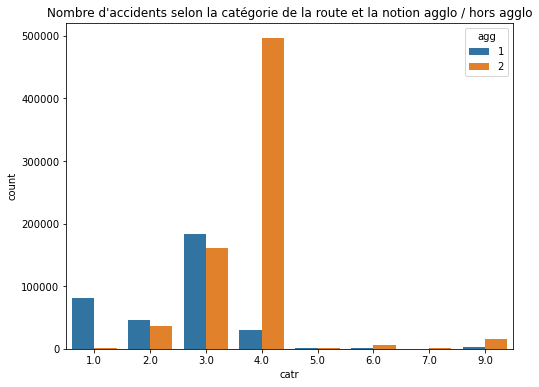

In [25]:
# On croise les informations issues des variables agg et catr
lieux = lieux.assign(agg = carac["agg"])

# En agglomération
plt.figure(figsize=(8,6))
sns.countplot(x = "catr", data = lieux, hue = "agg");
plt.title("Nombre d'accidents selon la catégorie de la route et la notion agglo / hors agglo")
# La catégorisation 4 comprend donc majoritairement les routes dans les agglomérations 


Text(0.5, 1.0, 'Gravité des accidents selon la catégorie de la route')

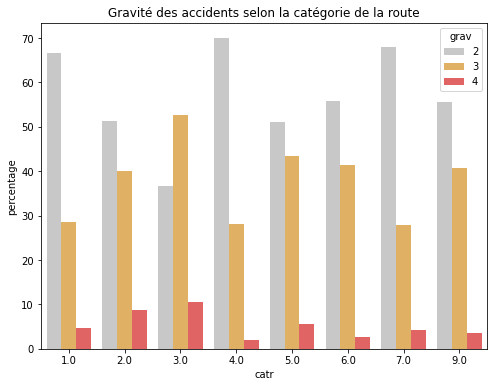

In [27]:
import matplotlib.pyplot as plt
grav_catr = (lieux.groupby(['catr'])['grav']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('grav'))

plt.figure(figsize=(8,6))
sns.barplot(x="catr", y="percentage", hue="grav", data=grav_catr, 
             palette=['#C8C8C8','#F4B650','#F45050',]);
plt.title("Gravité des accidents selon la catégorie de la route")

# Les accidents les plus graves se retrouvent dans les routes départementales et nationales 

Text(0.5, 1.0, 'Gravité des accidents pour les routes communales selon la notion agglo / hors agglo')

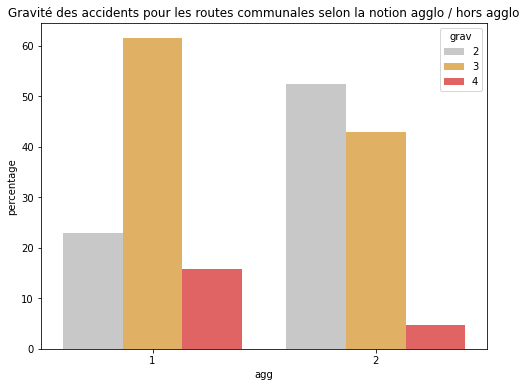

In [28]:
lieux_filtre_routes_dep = lieux[lieux.catr ==3]
grav_catr_dep = (lieux_filtre_routes_dep.groupby(['agg'])['grav']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('grav'))

plt.figure(figsize=(8,6))
sns.barplot(x="agg", y="percentage", hue="grav", data=grav_catr_dep, 
             palette=['#C8C8C8','#F4B650','#F45050',]);
plt.title("Gravité des accidents pour les routes communales selon la notion agglo / hors agglo")

# Les routes communales hors d'agglomérations sont les routes les plus risquées ! 
# Ce fait est masqué par la grande majorité de routes d'agglomération dans la catégorie 4

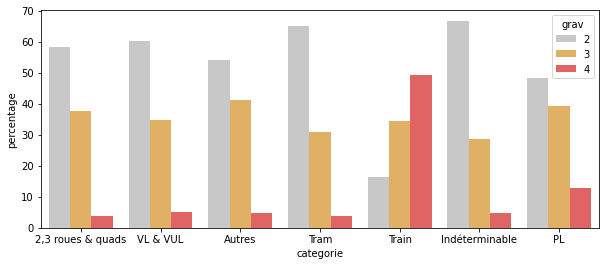

In [22]:
# Fonction pour regrouper les nombreuses catégories de véhicules 

def regroupement_cat_veh(x) :
    cat1 = [1, 2, 4, 5, 6, 30, 31, 32, 33,34, 50, 60, 80, 35, 36, 41, 42, 43] # 2, 3 roues et quads
    cat2 = [3, 7, 8, 9, 10, 11, 12] # VL et VUL
    cat3 = [13, 14, 15, 16, 17, 20, 21, 37, 38, 18] # PL 
    cat4 = [39] # Trains
    cat5 = [40, 19] # Tramways
    cat6 = [99] # Autres
    cat7 = [0] # Indéterminable 

    if x in cat1 :
        return "2,3 roues & quads"
    elif x in cat2 :
        return "VL & VUL"
    elif x in cat3 :
        return "PL"
    elif x in cat4 :
        return "Train"
    elif x in cat5:
        return "Tram"
    elif x in cat6 :
        return "Autres"
    elif x in cat7 :
        return "Indéterminable"
    
vehicules["categorie"] = vehicules.catv.apply(regroupement_cat_veh)

import matplotlib.pyplot as plt
veh = (vehicules.groupby(['categorie'])['grav']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('grav'))

# Display plotx
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x="categorie", y="percentage", hue="grav", data=veh, 
             palette=['#C8C8C8','#F4B650','#F45050',]);
plt.title("Gravité des accidents selon le type de véhicule impliqué")
# Les trains et poids lourds génèrent les accidents les plus grave (taille + vitesse ?))